Ce document a été produit dans le but de produire des données sur l'incidence du cancer en Afrique. Travail réalisé par Yosr Hamdi, Ali Afzal Zatchi, Ines Abdeljaoued, Alia Ben Kahla...

In [1]:
import os
import time
from datetime import date, timedelta

import pandas as pd
import numpy as np

import requests 
from bs4 import BeautifulSoup

import io
import re
import itertools
import zipfile

In [2]:
pays = pd.read_excel("PaysdAfrique.xlsx")

In [3]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


In [4]:
evolution = pd.read_excel("regionsAfrique.xlsx")

In [5]:
evolution.head()

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,...,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
0,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,...,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
1,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
2,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
3,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
4,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [6]:
annee = ["2002","2008","2012","2018"]

In [7]:
index = ["North", "West", "Central", "East", "South"]
evolution.index = index
evolution

,Region,B_C2002,B_C2008,B_C2012,BC_2018,B_C2002Mort,B_C2008Mort,B_C2012Mort,BC_2018Mort,Unnamed: 9,...,Bladder 2018 F,Unnamed: 81,Thyroid 2002 M,Thyroid 2002 F,Thyroid 2008 M,Thyroid 2008 F,Thyroid 2012 M,Thyroid 2012 F,Thyroid 2018 M,Thyroid 2018 F
North,North,23.2,32.7,43.2,48.9,16.7,17.8,17.4,18.4,NaN,...,3.2,NaN,NaN,NaN,NaN,NaN,1.4,4.4,1.6,5.7
West,West,27.8,31.8,38.6,37.3,19.6,19.0,20.1,17.8,NaN,...,1.4,NaN,NaN,NaN,NaN,NaN,0.3,1.0,0.5,1.5
Central,Central,16.5,21.3,26.8,27.9,12.1,13.1,14.9,15.8,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,0.7,1.2,0.8,1.3
East,East,19.5,19.3,30.4,29.9,14.1,11.4,15.6,15.4,NaN,...,2.4,NaN,NaN,NaN,NaN,NaN,1.1,2.7,1.1,2.5
South,South,33.4,38.1,38.9,46.2,16.3,19.3,15.5,15.6,NaN,...,1.5,NaN,NaN,NaN,NaN,NaN,0.6,1.6,1.7,6.0


In [8]:
#Incidence Eosophagus cancer
esm = pd.DataFrame(evolution, columns=['Es_C2M', 'Es_C8M', 'Es_C12M', 'Es_C18M']).transpose()
esw = pd.DataFrame(evolution, columns=['Es_C2F', 'Es_C8F', 'Es_C12F','Es_C18F']).transpose()

#Both men and women
esm.index = annee
esw.index = annee
eosophagussomme = esm.add(esw).transpose()/2
eosophagussomme

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


In [9]:
eosophagussomme

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


middle=c("CHA","CAR","CAM","EQG","GAB","CNG","ZAI","ANG")
west=c("CAP","MAU","SEN","GAM","GUB","WES","GIN","SIL","LIB","CDI","MAL","BUF","GHA","TOG","BEN","NIG","NIR")
east=c("MOZ","COM","STP","ERI","ETH","UGA","KEN","DJI","SOM","RWA","BUR","TAN","MAA","ZIM","ZAM","MAD" )

In [10]:
North = ["MAR","DZA","TUN","LBY","EGY","SDN", "SSD"]
South = ["NAM","BWA","ZAF","SWZ","LSO"] 
Central = ["TCD","CAF","CMR","GNQ","GAB","COG","COD","AGO", "STP"]#ok

West = ["MRT","SEN","GMB","GIN","SLE","LBR","GHA","TGO","BEN","NGA", "BFA", "CPV", "CIV", "GNB", "MLI", "NER",'ESH']
East = ["BDI", "COM", "DJI", "ERI", "ETH", "KEN", "MDG", "MWI", "MUS", "MOZ", "RWA", "SYC", "SOM", "UGA", "ZMB", "ZWE", "TZA", "-99"]

In [11]:
len(North), len(Central), len(South)

(7, 9, 5)

In [12]:
len(East), len(West)

(18, 17)

In [13]:
pays.head()

,Northern Africa (210 002 000),West Africa (331 255 000),Central Africa (135 750 000),East Africa (373 202 000),Southern Africa (60 425 000)
0,Maroc (35 280 451),Mauritanie (4 166 000),Tchad (14 485 740),Erythree (5 351 000),Namibie (2 513 000)
1,Algerie (40 610 154),Senegal (15 580 485),Centrafrique (4 998 000),Ethiopie (101 850 000),Botswana (2 3003 000)
2,Tunise (11 411 212),Gambie (2 054 000),Cameroun (23 920 400),Ouganda (41 175 440),Afrique du sud (54 975 900)
3,Libye(6 330 000),Guinee Bissau (1 888 000),Guinee Equatoriale (869 000),Kenya (47 450 250),Swaziland (1 220 000)
4,Egypte (93 380 570),Guinee (12 940 000),Gabon (1 763 000),Djibouti (899 000),Lesotho (2 160 000)


Ajout d'une colonne région (Reg) dans la base 'Africa' (qui est .shp)
Régler ce problème pour la suite des affichages sur la carte

Fonction nous permettant d'ajouter des données d'incidence ou de mortalité ou de fatalité

In [14]:
#!pip install pyshp
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#comuna = 'Tunisia'
#com_id = df[df.ADM0_NAME == comuna].index.get_values()[0]
#plot_shape(com_id, comuna)
#print(com_id)

In [16]:
import geopandas as gp
import numpy as np
import matplotlib.pyplot as plt
import sys
path = gp.datasets.get_path('naturalearth_lowres')
earth = gp.read_file(path)
africa = earth[earth.continent=='Africa'].copy()

In [17]:
type(africa)

geopandas.geodataframe.GeoDataFrame

In [18]:
type(africa.geometry)

geopandas.geoseries.GeoSeries

In [19]:
#type(africa.geometry[0])

In [20]:
africa.plot()
#plt.show()

In [21]:
africa.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

In [22]:
#!pip install geopandas
#!pip install descartes

In [23]:
t = africa['iso_a3'].copy()
reg = ['NULL' for i in range(len(t))]
for i in range(51):
    x = t.iloc[i]
    if x in North:
        reg[i] = 'North'
        #print(reg)
    elif x in East:
        reg[i] = 'East'
    elif x in West:
        reg[i] = 'West'
    elif x in Central:
        reg[i] = 'Central'
    elif x in South:
        reg[i] = 'South'
    else:
        reg[i] = 'NULL'
print(reg)
africa['Region'] = reg
africa = africa.sort_values('Region').copy()

['East', 'West', 'Central', 'East', 'East', 'North', 'Central', 'South', 'South', 'East', 'South', 'South', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'West', 'Central', 'Central', 'Central', 'Central', 'East', 'East', 'East', 'South', 'Central', 'East', 'East', 'West', 'North', 'North', 'East', 'North', 'North', 'North', 'East', 'East', 'East', 'East', 'East', 'North']


In [24]:
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region
68,1772255,Africa,Gabon,GAB,35980.0,"POLYGON ((11.27645 2.26105, 11.75167 2.32676, ...",Central
25,54841552,Africa,South Africa,ZAF,739100.0,"POLYGON ((16.34498 -28.57671, 16.82402 -28.082...",South
71,19196246,Africa,Malawi,MWI,21200.0,"POLYGON ((32.75938 -9.23060, 33.73972 -9.41715...",East
60,24184810,Africa,Côte d'Ivoire,CIV,87120.0,"POLYGON ((-8.02994 10.20653, -7.89959 10.29738...",West
75,11466756,Africa,Burundi,BDI,7892.0,"POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...",East


In [25]:
#lungsomme = lungsomme/lungsomme.max().astype(np.float64)


In [26]:
cancer = eosophagussomme
cancer

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


In [27]:
LC = cancer['2002']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Eso2002'] = reg

LC = cancer['2008']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Eso2008'] = reg

LC = cancer['2012']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Eso2012'] = reg

LC = cancer['2018']
reg = [0 for i in range(51)]
for i in range(51):
    x = africa['Region'].iloc[i]
    #print(x,)
    if x == 'North':
        reg[i] = LC.iloc[0]
        #print(reg)
    elif x == 'West':
        reg[i] = LC.iloc[1]
    elif x == 'Central':
        reg[i] = LC.iloc[2]
    elif x == 'East':
        reg[i] = LC.iloc[3]
    elif x == 'South':
        reg[i] = LC.iloc[4]
print(africa['Region'].iloc[0]), print(reg[0])
africa['Eso2018'] = reg


Central
0.85
Central
1.15
Central
3.1
Central
1.9


In [28]:
#africa.geometry.apply(touches)
africa.sample(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Eso2002,Eso2008,Eso2012,Eso2018
14,37345935,Africa,Sudan,SDN,176300.0,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...",North,1.75,1.80,1.95,1.55
162,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-2.16991 35.16840, -1.79299 34.52792...",North,1.75,1.80,1.95,1.55
51,14668522,Africa,Senegal,SEN,39720.0,"POLYGON ((-16.71373 13.59496, -17.12611 14.373...",West,0.95,1.20,0.60,1.20
164,6653210,Africa,Libya,LBY,90890.0,"POLYGON ((25.00000 22.00000, 25.00000 20.00304...",North,1.75,1.80,1.95,1.55
74,29310273,Africa,Angola,AGO,189000.0,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4...",Central,0.85,1.15,3.10,1.90


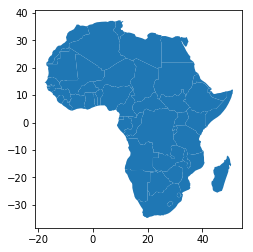

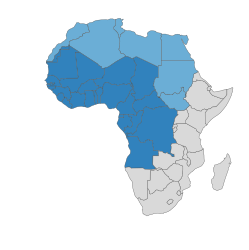

In [29]:
#https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html
from matplotlib import cm
cmap = cm.get_cmap('tab20c')
fig, ax = plt.subplots()
africa.plot(column='Eso2002', cmap=cmap, linewidth=0.3, ax=ax, edgecolor='.3')
ax.axis('off')
plt.show()

In [30]:
africa.sample()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Region,Eso2002,Eso2008,Eso2012,Eso2018
162,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-2.16991 35.16840, -1.79299 34.52792...",North,1.75,1.8,1.95,1.55


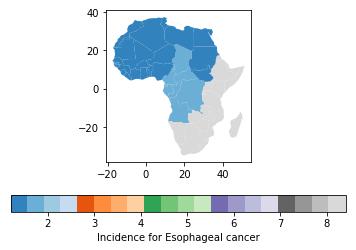

In [31]:
fig, ax = plt.subplots(1, 1)
#africa.plot(column='Lung2002');
africa.plot(column='Eso2018', cmap=cmap,
            ax=ax, legend=True, 
            legend_kwds={'label': "Incidence for Esophageal cancer", 'orientation': "horizontal"})
plt.show()

ValueError: Colormap Red is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

In [32]:
#!pip install mapclassify
import mapclassify

In [33]:
import matplotlib.pyplot as plt
import geopandas
cmap = cm.get_cmap('copper')

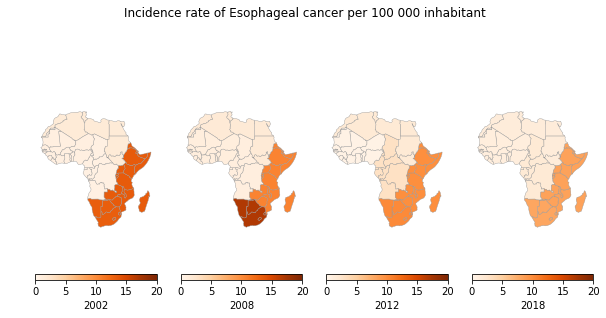

In [34]:
cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('YlOrRd')
#cmap = cm.get_cmap('Greens')
#cmap = cm.get_cmap('tab20c')
#cmap = cm.get_cmap('Set2')
#from cartopy import crs as ccrs
# Generate a figure with two axes, one for CartoPy, one for GeoPandas

vmin, vmax = 0, 20
cmap = cm.get_cmap('Oranges')

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Esophageal cancer per 100 000 inhabitant')
# Make the CartoPy plot
line1 = africa.plot(column="Eso2002", cmap=cmap, legend=True, linewidth=0.4, ax=axs[0], edgecolor='0.6',
            legend_kwds={'label': "2002", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line2 = africa.plot(column="Eso2008", cmap=cmap, legend=True, linewidth=0.4, ax=axs[1], edgecolor='0.6',
            legend_kwds={'label': "2008", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line3 = africa.plot(column="Eso2012", cmap=cmap, legend=True, linewidth=0.4, ax=axs[2], edgecolor='0.6',
            legend_kwds={'label': "2012", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)

line4 = africa.plot(column="Eso2018", cmap=cmap, legend=True, linewidth=0.4, ax=axs[3], edgecolor='0.6',
            legend_kwds={'label': "2018", 'orientation': "horizontal"}, vmin=vmin, vmax=vmax)
#plt.colorbar(label='log$_{10}$(population)')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[3].axis('off')
plt.savefig('Figures/eoso1.png')
plt.show()

In [35]:
cancer

,2002,2008,2012,2018
North,1.75,1.80,1.95,1.55
West,0.95,1.20,0.60,1.20
Central,0.85,1.15,3.10,1.90
East,13.55,10.65,9.85,8.40
South,13.35,17.00,10.20,8.05


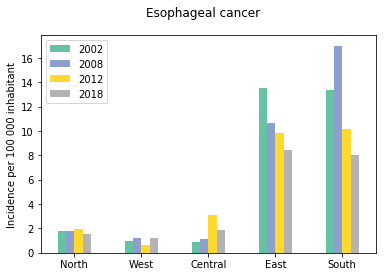

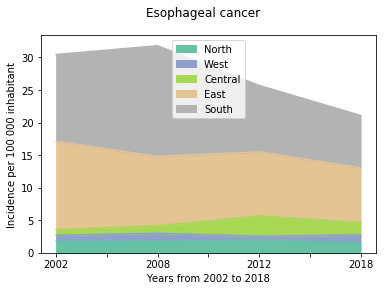

In [36]:
#cmap = cm.get_cmap('YlGn')
#cmap = cm.get_cmap('winter')
#cmap = cm.get_cmap('tab20c')
cmap = cm.get_cmap('Set2')
ax = cancer.plot.bar(rot=0, cmap=cmap)
plt.suptitle('Esophageal cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.savefig('Figures/eoso2.png')
plt.show()
cancer.transpose().plot.area(cmap=cmap)
plt.suptitle('Esophageal cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Years from 2002 to 2018')
plt.savefig('Figures/eoso3.png')
plt.show()

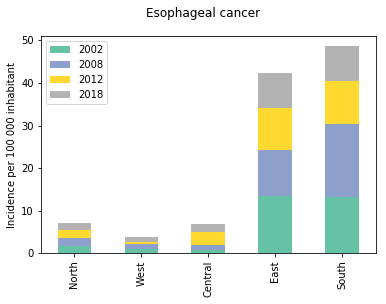

In [37]:
cancer.plot(kind='bar', stacked=True, cmap=cmap)
plt.suptitle('Esophageal cancer')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.savefig('Figures/eoso4.png')
plt.show()

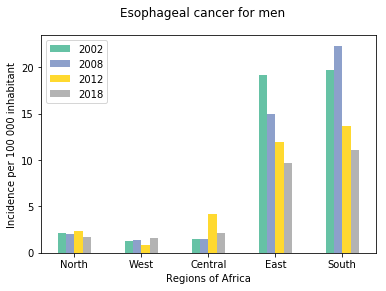

In [38]:
#cmap = cm.get_cmap('Set2')
esm.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Esophageal cancer for men')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
plt.savefig('Figures/eoso5.png')
plt.show()

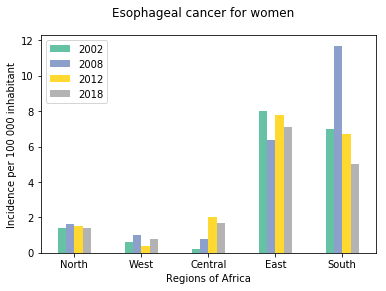

In [39]:
esw.transpose().plot.bar(rot=0, cmap=cmap)
plt.suptitle('Esophageal cancer for women')
plt.ylabel('Incidence per 100 000 inhabitant')
plt.xlabel('Regions of Africa')
plt.savefig('Figures/eoso6.png')
plt.show()

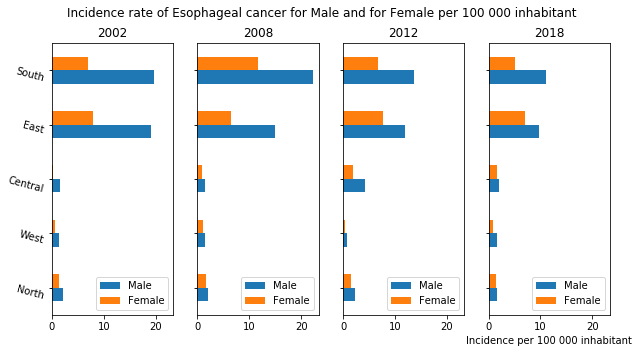

In [40]:
# A python dictionary

data2002 = {"Male":esm.iloc[0], "Female":esw.iloc[0], }; 
data2002 = pd.DataFrame(data=data2002, index=index);

data2008 = {"Male":esm.iloc[1], "Female":esw.iloc[1], }; 
data2008 = pd.DataFrame(data=data2008, index=index);

data2012 = {"Male":esm.iloc[2], "Female":esw.iloc[2], }; 
data2012 = pd.DataFrame(data=data2012, index=index);

data2018 = {"Male":esm.iloc[3], "Female":esw.iloc[3], }; 
data2018 = pd.DataFrame(data=data2018, index=index);

fig, axs = plt.subplots(1,4,figsize=(10, 5), sharex=True, sharey=True)
fig.suptitle('Incidence rate of Esophageal cancer for Male and for Female per 100 000 inhabitant')
    
p1 = data2002.plot.barh(stacked=False, rot=-15, ax=axs[0], title="2002");
p2 = data2008.plot.barh(stacked=False, rot=-15, ax=axs[1], title="2008");
p3 = data2012.plot.barh(stacked=False, rot=-15, ax=axs[2], title="2012");
p4 = data2018.plot.barh(stacked=False, rot=-15, ax=axs[3], title="2018");

plt.xlabel('Incidence per 100 000 inhabitant')
plt.ylabel('Regions of Africa')
plt.legend()
plt.savefig('Figures/eoso7.png')
plt.show(block=True);

In [41]:
esw

,North,West,Central,East,South
2002,1.4,0.6,0.2,8.0,7.0
2008,1.6,1.0,0.8,6.4,11.7
2012,1.5,0.4,2.0,7.8,6.7
2018,1.4,0.8,1.7,7.1,5.0
